In [1]:
import typing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DataRow = list[int]

In [3]:
# 为文科理科分别生成测验分数段人数
def gen_quiz_data(art: int, sci: int) -> tuple[DataRow, DataRow]:
    """ 为文科理科分别生成测验分数段人数

    Args:
        art (int): 文科人数
        sci (int): 理科人数

    Returns:
        tuple[DataRow, DataRow]: 文科理科测验分数段人数

    """
    # 文科测验分数中心, 方差
    art_mean, art_std = 90, 10
    # 理科测验分数中心, 方差
    sci_mean, sci_std = 85, 10
    # 文科测验分数
    art_data = np.random.normal(art_mean, art_std, art).astype(int)
    # 理科测验分数
    sci_data = np.random.normal(sci_mean, sci_std, sci).astype(int)
    # 分数段 (0-59, 60-69, 70-79, 80-89, 90-100)
    bins = [0] + list(range(60, 101, 10))
    # 文科测验分数段人数 (0-59, 60-69, 70-79, 80-89, 90-100)
    art_data = np.histogram(art_data, bins=bins)[0]
    # 理科测验分数段人数 (0-59, 60-69, 70-79, 80-89, 90-100)
    sci_data = np.histogram(sci_data, bins=bins)[0]
    return art_data.tolist(), sci_data.tolist()

gen_quiz_data(67, 92)


([0, 1, 7, 26, 24], [0, 3, 18, 45, 22])

In [4]:
def gen_quiz_markdown_table(art_data: DataRow, sci_data: DataRow) -> str:
    """ 生成测验分数段人数 Markdown 表格

    Args:
        art_data (DataRow): 文科测验分数段人数
        sci_data (DataRow): 理科测验分数段人数

    Returns:
        str: Markdown 表格

    """
    head_text = """\
| 分数段 | 60以下 | 60-69 | 70-79 | 80-89 | 90-100 | 总计 |
| :----- | :----- | :---- | :---- | :---- | :----- | :--- |
"""
    # 总计
    total_data = [str(x + y) for x, y in zip(art_data, sci_data)]
    # 文科测验分数段人数总计
    art_total = sum(art_data)
    # 理科测验分数段人数总计
    sci_total = sum(sci_data)
    # 总计
    total = art_total + sci_total
    # 文科测验分数段人数
    art_data = [str(x) for x in art_data]
    # 理科测验分数段人数
    sci_data = [str(x) for x in sci_data]
    # 文科测验分数段人数 Markdown 表格
    art_table = "| 文科 | " + " | ".join(art_data) + f" | {art_total} |"
    # 理科测验分数段人数 Markdown 表格
    sci_table = "| 理科 | " + " | ".join(sci_data) + f" | {sci_total} |"
    # 总计 Markdown 表格
    total_table = "| 总计 | " + " | ".join(total_data) + f" | {total} |"
    # Markdown 表格
    table = head_text + art_table + '\n' + sci_table + '\n' + total_table
    return table

test_table = gen_quiz_markdown_table([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
print(test_table)

| 分数段 | 60以下 | 60-69 | 70-79 | 80-89 | 90-100 | 总计 |
| :----- | :----- | :---- | :---- | :---- | :----- | :--- |
| 文科 | 1 | 2 | 3 | 4 | 5 | 15 |
| 理科 | 6 | 7 | 8 | 9 | 10 | 40 |
| 总计 | 7 | 9 | 11 | 13 | 15 | 55 |


In [6]:
plt.rcParams['font.family'] = 'Source Han Sans SC'

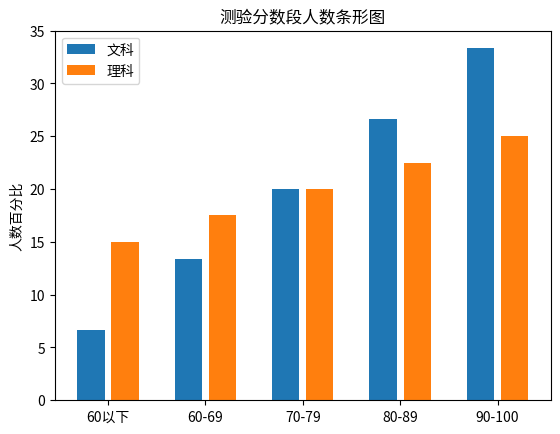

In [11]:
def plot_quiz_bargraph(art_data: DataRow, sci_data: DataRow) -> None:
    """ 画出测验分数段人数条形图

    Args:
        art_data (DataRow): 文科测验分数段人数
        sci_data (DataRow): 理科测验分数段人数

    """
    art_percent = [x * 100.0 / sum(art_data) for x in art_data]
    sci_percent = [x * 100.0 / sum(sci_data) for x in sci_data]
    
    x_labels = ["60以下", "60-69", "70-79", "80-89", "90-100"]
    x = np.arange(len(x_labels))
    width = 0.35
    # 文科测验分数段人数条形图
    art_bargraph = plt.bar(x - width / 2, art_percent, 0.8 * width, label="文科")
    # 理科测验分数段人数条形图
    sci_bargraph = plt.bar(x + width / 2, sci_percent, 0.8 * width, label="理科")
    # 设置 x 轴标签
    plt.xticks(x, x_labels)
    # 设置 y 轴标签
    plt.ylabel("人数百分比")
    # 设置图例
    plt.legend()
    # 设置标题
    plt.title("测验分数段人数条形图")
    # 显示条形图
    plt.show()

plot_quiz_bargraph([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])    

In [12]:
def gen_interested_level(total: int) -> DataRow:
    """ 生成感兴趣程度的人数

    Args:
        total (int): 总人数

    Returns:
        DataRow: 感兴趣程度的人数

    """
    # 感兴趣程度0-4, 0表示感兴趣程度最高，4表示感兴趣程度最低，权重为
    weights = [0.2, 0.3, 0.3, 0.1, 0.1]
    # 感兴趣程度的人数
    interested_level = np.random.multinomial(total, weights)
    return interested_level.tolist()

gen_interested_level(100)

[15, 30, 34, 13, 8]

In [15]:
def gen_interested_level_markdown_table(interested_level: DataRow) -> str:
    """ 生成感兴趣程度的人数 Markdown 表格

    Args:
        interested_level (DataRow): 感兴趣程度的人数

    Returns:
        str: Markdown 表格

    """
    head_text = """\
| 对党史学习兴趣程度 | 非常感兴趣 | 感兴趣 | 一般 | 不感兴趣 | 非常不感兴趣 | 总计 |
| :----------------- | :--------- | :----- | :--- | :------- | :------------- | :--- |
"""
    total = sum(interested_level)
    interested_level = [str(x) for x in interested_level]
    interested_level_table = "| 人数 | " + " | ".join(interested_level) + f" | {total} |"
    table = head_text + interested_level_table
    return table

print(gen_interested_level_markdown_table([1, 2, 3, 4, 5]))

| 对党史学习兴趣程度 | 非常感兴趣 | 感兴趣 | 一般 | 不感兴趣 | 非常不感兴趣 | 总计 |
| :----------------- | :--------- | :----- | :--- | :------- | :------------- | :--- |
| 人数 | 1 | 2 | 3 | 4 | 5 | 15 |


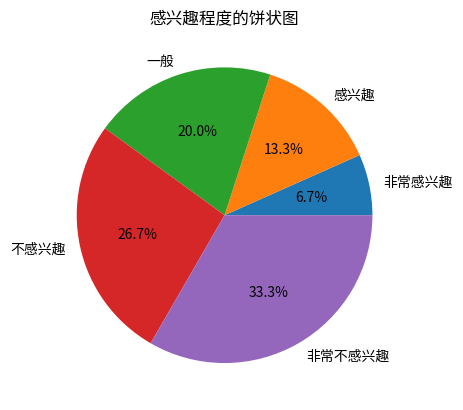

In [17]:
def plot_interested_level_pie_chart(interested_level: DataRow) -> None:
    """ 画出感兴趣程度的饼图

    Args:
        interested_level (DataRow): 感兴趣程度的人数

    """
    labels = ["非常感兴趣", "感兴趣", "一般", "不感兴趣", "非常不感兴趣"]
    plt.pie(interested_level, labels=labels, autopct="%1.1f%%")
    plt.title("感兴趣程度的饼状图")
    plt.show()

plot_interested_level_pie_chart([1, 2, 3, 4, 5])

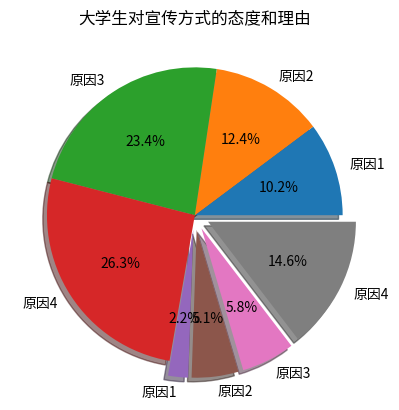

| 对宣传方式感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 原因1 | 14 | 10.22% |
| 原因2 | 17 | 12.41% |
| 原因3 | 32 | 23.36% |
| 原因4 | 36 | 26.28% |
| 感兴趣人数总计 | 99 | 72.26% |
| 原因1 | 3 | 2.19% |
| 原因2 | 7 | 5.11% |
| 原因3 | 8 | 5.84% |
| 原因4 | 20 | 14.60% |
| 不感兴趣人数总计 | 38 | 27.74% |
| 总计 | 137 | 100.00% |


In [28]:
# 对宣传方式的态度和原因模板类
class AttitudeAndReasonTemplate:
    # 对宣传方式态度原因和权重
    Reasons = dict[str, float]
    def __init__(self, name: str,
                  total: int,
                  pop_percent: float,
                    popular_reason: Reasons,
                    unpopular_reason: Reasons) -> None:
        """ 对宣传方式的态度和原因模板类

        Args:
            attitude (str): 对宣传方式的态度
            reason (str): 对宣传方式的原因

        """
        self.name = name
        self.total = total
        self.pop_percent = pop_percent
        self.popular_total = np.random.binomial(total, pop_percent)
        self.unpopular_total = total - self.popular_total
        self.popular_reason = popular_reason
        self.unpopular_reason = unpopular_reason

    def __str__(self) -> str:
        return self.name + " " + str(self.total) + " " + str(self.good_reason) + " " + str(self.bad_reason)
    
    def gen_population(self) -> None:
        """ 生成不同原因的人数
        """
        popular_weight = list(self.popular_reason.values())
        unpopular_weight = list(self.unpopular_reason.values())
        self.popular_reason_population = np.random.multinomial(self.popular_total, popular_weight)
        self.unpopular_reason_population = np.random.multinomial(self.unpopular_total, unpopular_weight)

    def gen_markdown_table(self) -> str:
        """ 生成 Markdown 表格

        Returns:
            str: Markdown 表格

        """
        head_text = f"""\
| 对{self.name}感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
"""
        pop_sum = sum(self.popular_reason_population)
        unpop_sum = sum(self.unpopular_reason_population)
        total_sum = pop_sum + unpop_sum

        pop_name = list(self.popular_reason.keys())
        unpop_name = list(self.unpopular_reason.keys())
        pop_percent = [f"{x / total_sum:.2%}" for x in self.popular_reason_population]
        unpop_percent = [f"{x / total_sum:.2%}" for x in self.unpopular_reason_population]
        pop_sum_percent = f"{pop_sum / total_sum:.2%}"
        unpop_sum_percent = f"{unpop_sum / total_sum:.2%}"

        pop_table = [f"| {pop_name[i]} | {self.popular_reason_population[i]} | {pop_percent[i]} |"
                      for i in range(len(pop_name))]
        unpop_table = [f"| {unpop_name[i]} | {self.unpopular_reason_population[i]} | {unpop_percent[i]} |"
                        for i in range(len(unpop_name))]
        pop_table.append(f"| 感兴趣人数总计 | {pop_sum} | {pop_sum_percent} |")
        unpop_table.append(f"| 不感兴趣人数总计 | {unpop_sum} | {unpop_sum_percent} |")

        total_table = f"| 总计 | {total_sum} | 100.00% |"

        table = head_text + "\n".join(pop_table) + "\n" + "\n".join(unpop_table) + "\n" + total_table
        return table

    def gen_pie_chart_explode_unpop(self) -> None:
        """ 生成饼图，将不感兴趣的原因突出显示
        """
        labels = list(self.popular_reason.keys()) + list(self.unpopular_reason.keys())
        sizes = self.popular_reason_population.tolist() + self.unpopular_reason_population.tolist()
        explode = [0] * len(self.popular_reason_population) + [0.1] * len(self.unpopular_reason_population)
        plt.pie(sizes, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True)
        plt.title(f"大学生对{self.name}的态度和理由")
        plt.show()


test_reason = {"原因1": 0.1, "原因2": 0.2, "原因3": 0.3, "原因4": 0.4}
test_template = AttitudeAndReasonTemplate("宣传方式", 137, 0.7, test_reason, test_reason)
test_template.gen_population()
test_template.gen_pie_chart_explode_unpop()
print(test_template.gen_markdown_table())